In [83]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import scipy
import sklearn
import pandas as pd
import base64
import wave
from wave import open as open_wave

In [84]:
#AJ's Voice Samples
AJ_audio = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/AJ/"
audio_list1 = librosa.util.find_files(AJ_audio, ext=['wav']) 
#Imposter'ss Voice Samples
imposter_Audio = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Imposter/"
audio_list2 = librosa.util.find_files(imposter_Audio, ext=['wav'])
#Imposter2 Voice samples
imposter_audio2 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Ruby/"
audio_list3 = librosa.util.find_files(imposter_Audio, ext=['wav'])

In [85]:
data=np.zeros([120,21]);
featuredf  = pd.DataFrame(data, columns = ['User', 'Average', 'std', 'zcr', 'centroid', 'rollof', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14','label'])
featuredf.iloc[0:40,0]='AJ';
featuredf.iloc[40:80,0]='Imposter';
featuredf.iloc[80:120,0]='Imposter2';
featuredf.iloc[0:40,-1]=1;
featuredf.iloc[40:80,-1]=0;
featuredf.iloc[80:120,-1]=0;

In [86]:
#AJ's sampling rate
AJ1 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/AJ/AJ (1).wav"
x, sr = librosa.load(AJ1)
ipd.Audio(x, rate=sr)
sr

22050

In [87]:
#Imposter's sampling rate
Imposter1 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Imposter/Imposter (1).wav"
x1, sr1 = librosa.load(Imposter1)
ipd.Audio(x1, rate=sr1)
sr1

22050

In [88]:
#Imposter2's sampling rate
Imposter2 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Ruby/Ruby (1).wav"
x2, sr2 = librosa.load(Imposter2)
ipd.Audio(x2, rate=sr2)
sr2

22050

In [89]:
def normalize(x1, axis=0):
    return sklearn.preprocessing.minmax_scale(x1, axis=axis)

# AJ - Feature Extraction

In [90]:
# AJ - Zooming in
ind=0;
for audio1 in audio_list1:
    data1,sample_rate1=librosa.load(audio1)
    zero_crossings1 = librosa.zero_crossings(data1, pad=False) 
    spectral_centroids1 = librosa.feature.spectral_centroid(data1, sr=sr)[0]
    spectral_rolloff1 = librosa.feature.spectral_rolloff(data1+0.01, sr=sr)[0]
    mfccs1 = librosa.feature.mfcc(data1, sr=sr,n_mfcc=14)
    featuredf.iloc[ind,1]=np.mean(data1)
    featuredf.iloc[ind,2]=np.std(data1)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids1))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings1)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff1))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs1,1)
    ind=ind+1;

# Imposter - Feature Extraction

In [91]:
#Imposter - Zooming in
ind=40;
for audio in audio_list2:
    data,sample_rate=librosa.load(audio)
    featuredf.iloc[ind,1]=np.mean(data)
    featuredf.iloc[ind,2]=np.std(data)  
    zero_crossings = librosa.zero_crossings(data, pad=False)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr1)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr1)[0]
    mfccs = librosa.feature.mfcc(data, sr=sr1,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs,1)
    ind=ind+1;

# Imposter2 - Feature Extraction

In [93]:
#Imposter2 - Zooming in
ind=80;
for audio in audio_list3:
    data2,sample_rate2=librosa.load(audio)
    featuredf.iloc[ind,1]=np.mean(data2)
    featuredf.iloc[ind,2]=np.std(data2)  
    zero_crossings2 = librosa.zero_crossings(data2, pad=False)
    spectral_centroids2 = librosa.feature.spectral_centroid(data2, sr=sr2)[0]
    spectral_rolloff2 = librosa.feature.spectral_rolloff(data2+0.01, sr=sr2)[0]
    mfccs2 = librosa.feature.mfcc(data2, sr=sr2,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids2))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings2)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff2))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs2,1)
    ind=ind+1;

In [95]:
featuredf.to_csv("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Feature Extraction3samples.csv", header=True, index=False)  

# Classification

In [96]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import classification_report;
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [97]:
y=featuredf.label
x=featuredf.drop(['label','User'],axis=1)
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(120, 19)
(120,)
(96, 19) (96,)
(24, 19) (24,)


# Logistic Regression

ACC:0.958
AUC:0.929

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.93      0.95        24
weighted avg       0.96      0.96      0.96        24



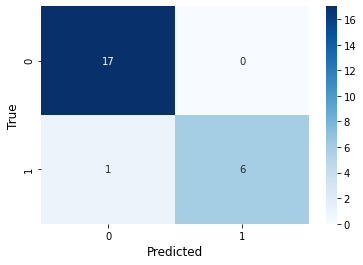

In [98]:
logreg = LogisticRegression();
logreg.fit(x_train,y_train);
y_pred = logreg.predict(x_test);
cf_matrix = confusion_matrix(y_test, y_pred);
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

# SVM

ACC:0.958
AUC:0.929

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.93      0.95        24
weighted avg       0.96      0.96      0.96        24



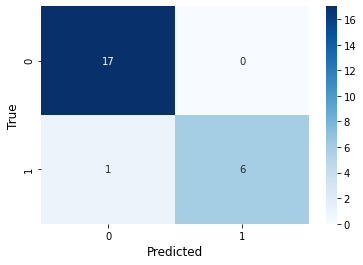

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
clSvm = SVC(kernel = 'linear') 
p = {'kernel':('linear',), 'C':[0.001,0.1,1,10]}
clSvm= GridSearchCV(clSvm, p,cv = KFold(4))
clSvm.fit(x_train, y_train )
y_pred = clSvm.predict(x_test)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

# Naivebayes

ACC:0.958
AUC:0.929

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.93      0.95        24
weighted avg       0.96      0.96      0.96        24



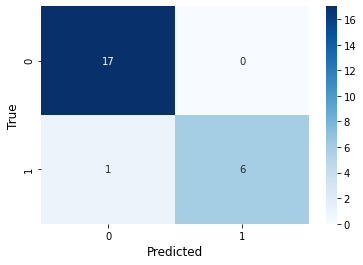

In [100]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# Decision  Tree

ACC:0.958
AUC:0.929

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.93      0.95        24
weighted avg       0.96      0.96      0.96        24



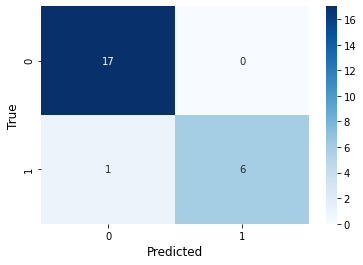

In [101]:
from sklearn.tree import DecisionTreeClassifier;
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# KNN

ACC:0.958
AUC:0.929

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.93      0.95        24
weighted avg       0.96      0.96      0.96        24



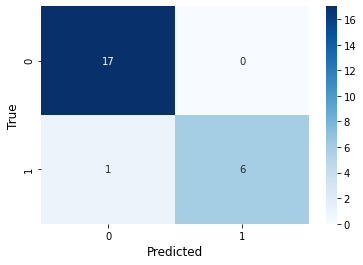

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(x_train, y_train)
y_pred = knnclf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))